## Essential libraries 

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

- Read data

In [324]:
path = "../data/housing.csv"
df = pd.read_csv(path)

- A quick view of df

In [325]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14514,-117.15,32.90,12.0,1681.0,381.0,1050.0,362.0,4.2008,176100.0,<1H OCEAN
13801,-117.63,34.37,20.0,7052.0,1306.0,2197.0,810.0,3.7252,167100.0,INLAND
19390,-120.85,37.78,15.0,3553.0,659.0,1684.0,611.0,3.3169,131200.0,INLAND
5232,-118.24,33.94,42.0,380.0,106.0,411.0,100.0,0.9705,90000.0,<1H OCEAN
13103,-121.34,38.44,14.0,3205.0,465.0,1439.0,456.0,5.7452,240900.0,INLAND


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Some missing values

In [327]:
total_bed_na = df.query('total_bedrooms.isna()')
total_bed_na

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


- Using the forward fill

In [328]:
df['total_bedrooms'] = df['total_bedrooms'].ffill()

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Alright, everthing is fine now

- Start with train test split

In [330]:
X = df.drop(['median_house_value'], axis='columns') # Data without the target
y = df['median_house_value'] # Target

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

- The new data framework that will be used

In [332]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15182,-117.08,33.04,10.0,2577.0,347.0,1193.0,365.0,6.5300,<1H OCEAN,264100.0
17286,-119.72,34.41,26.0,1648.0,378.0,954.0,405.0,3.2895,NEAR OCEAN,335000.0
16738,-122.42,37.71,44.0,2080.0,489.0,1781.0,478.0,3.6827,NEAR BAY,215300.0
3333,-122.62,38.92,13.0,520.0,115.0,249.0,109.0,1.8417,INLAND,84700.0
15121,-116.94,32.85,31.0,1293.0,232.0,599.0,228.0,4.7578,<1H OCEAN,161000.0
...,...,...,...,...,...,...,...,...,...,...
6852,-118.16,34.07,47.0,2994.0,543.0,1651.0,561.0,3.8644,<1H OCEAN,241500.0
20161,-119.29,34.37,41.0,1408.0,311.0,793.0,264.0,2.5441,NEAR OCEAN,161200.0
2883,-118.98,35.39,22.0,1812.0,457.0,1592.0,420.0,1.4146,INLAND,49100.0
18254,-122.09,37.39,36.0,1035.0,196.0,475.0,205.0,5.5385,NEAR BAY,359000.0


- Basic histogram plot

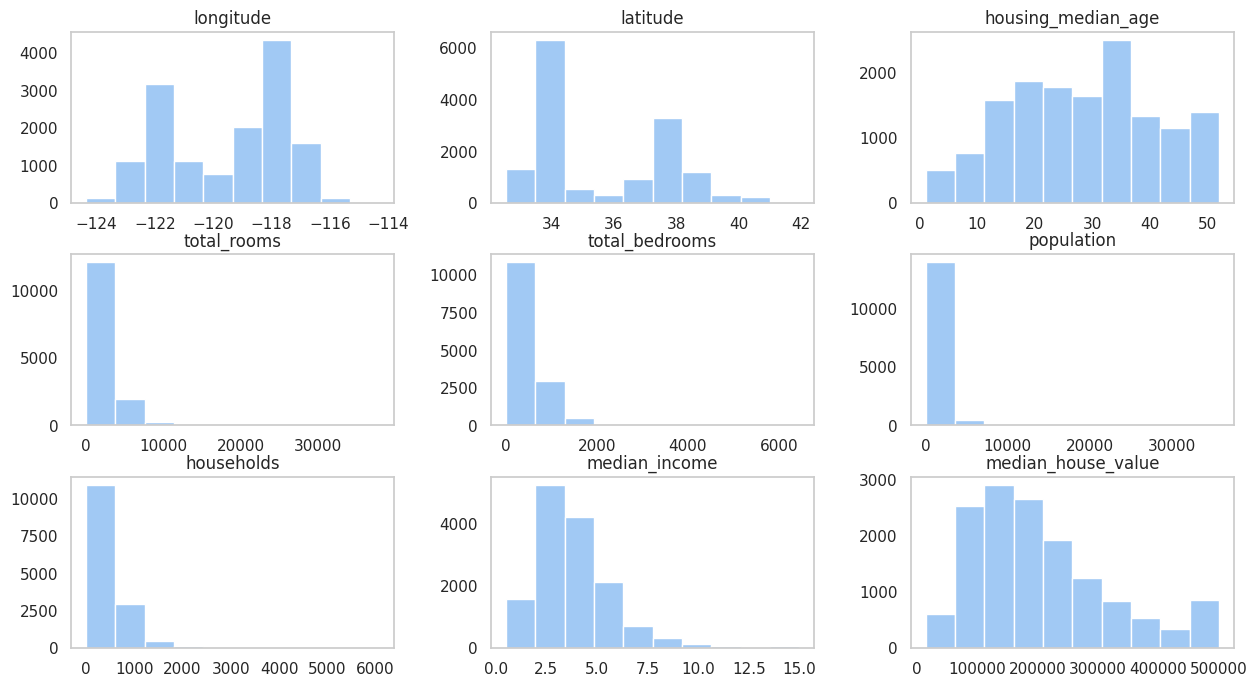

In [333]:
train_data.hist(figsize=(15, 8), grid=False)
plt.show()

- basic heatmap plot

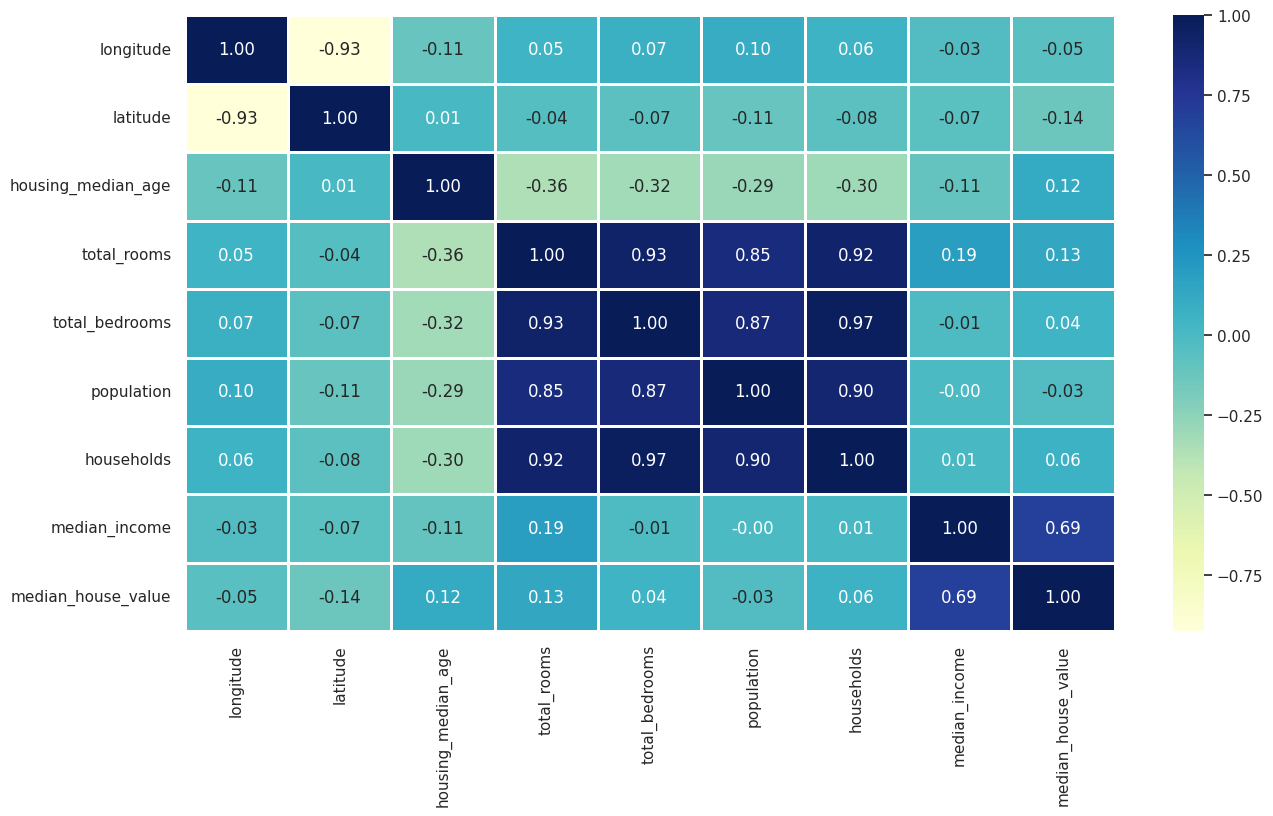

In [334]:
train_corr = train_data.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(train_corr, annot=True, linewidths=1, ax=ax, cmap='YlGnBu', fmt=".2f")
plt.show()

- Normalize the data before using the model

In [335]:
cols = ['total_rooms', 'total_bedrooms', 'population', 'households']

for col in cols:
    train_data[col] = np.log(train_data[col] + 1)

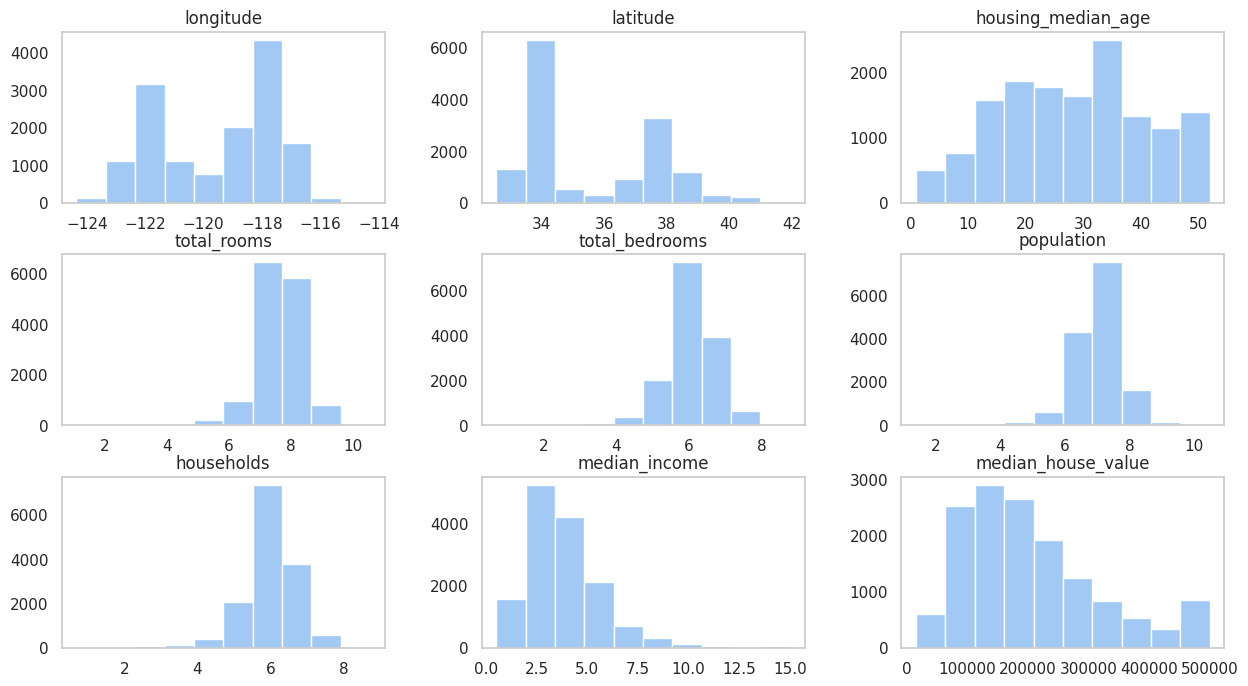

In [336]:
train_data.hist(figsize=(15, 8), grid=False)
plt.show()

In [337]:
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6404
INLAND        4580
NEAR OCEAN    1860
NEAR BAY      1599
ISLAND           5
Name: count, dtype: int64

- Using dummies

- Remove the ocean proximity columns because now its unnecessary

In [338]:
dummies = pd.get_dummies(train_data['ocean_proximity'])
train_data = train_data.join(dummies).drop(['ocean_proximity'], axis='columns')

In [339]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15182,-117.08,33.04,10.0,7.854769,5.852202,7.085064,5.902633,6.5300,264100.0,True,False,False,False,False
17286,-119.72,34.41,26.0,7.407924,5.937536,6.861711,6.006353,3.2895,335000.0,False,False,False,False,True
16738,-122.42,37.71,44.0,7.640604,6.194405,7.485492,6.171701,3.6827,215300.0,False,False,False,True,False
3333,-122.62,38.92,13.0,6.255750,4.753590,5.521461,4.700480,1.8417,84700.0,False,True,False,False,False
15121,-116.94,32.85,31.0,7.165493,5.451038,6.396930,5.433722,4.7578,161000.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,-118.16,34.07,47.0,8.004700,6.298949,7.409742,6.331502,3.8644,241500.0,True,False,False,False,False
20161,-119.29,34.37,41.0,7.250636,5.743003,6.677083,5.579730,2.5441,161200.0,False,False,False,False,True
2883,-118.98,35.39,22.0,7.502738,6.126869,7.373374,6.042633,1.4146,49100.0,False,True,False,False,False
18254,-122.09,37.39,36.0,6.943122,5.283204,6.165418,5.327876,5.5385,359000.0,False,False,False,True,False


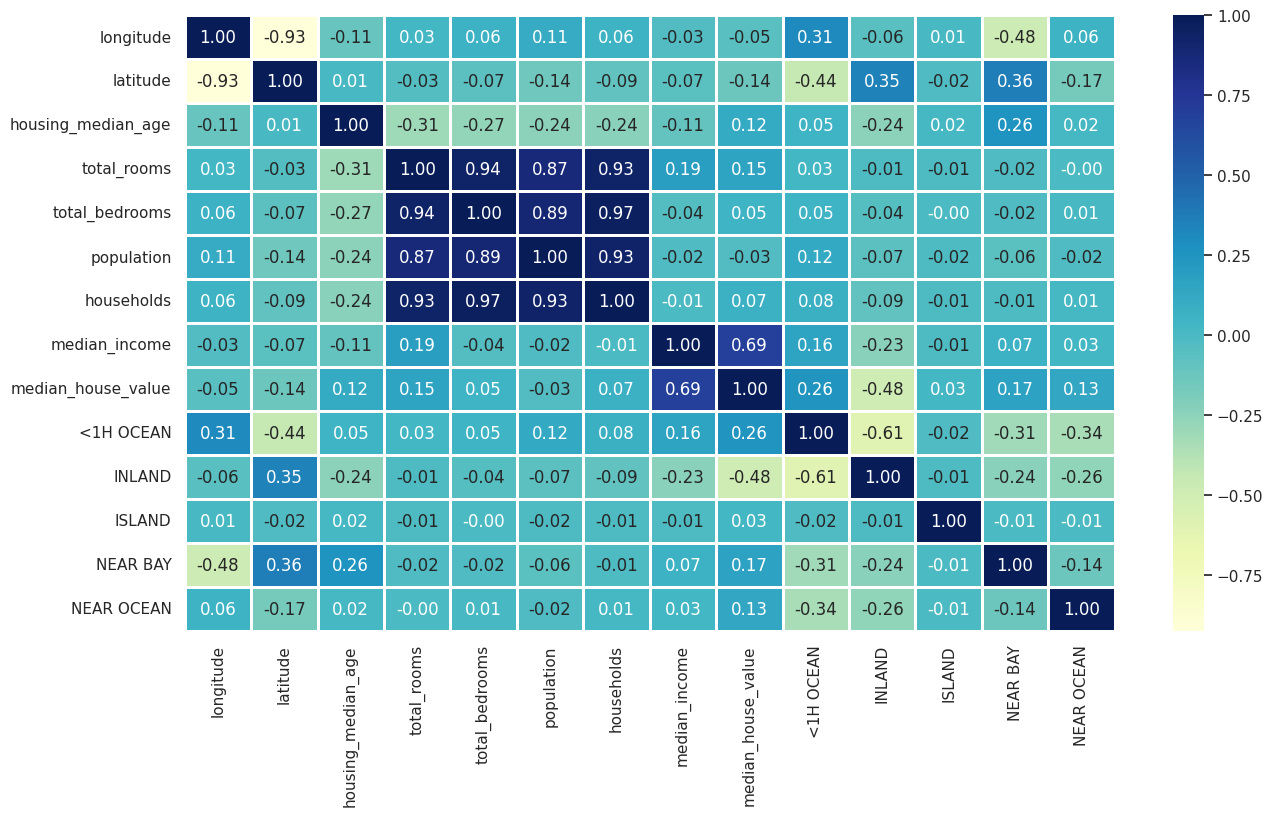

In [340]:
train_corr = train_data.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(train_corr, annot=True, linewidths=1, ax=ax, cmap='YlGnBu', fmt=".2f")
plt.show()

- Scatterploting

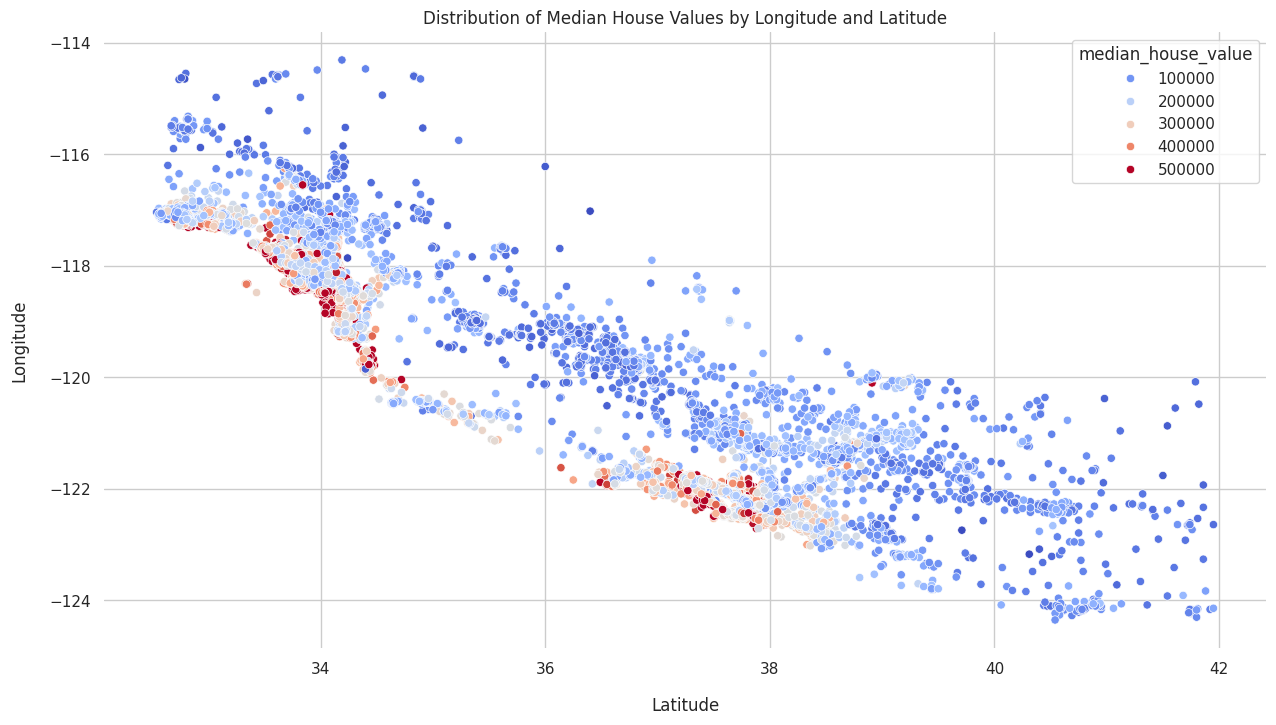

In [341]:
f, ax = plt.subplots(figsize=(15, 8))

sns.scatterplot(data=train_data, x='latitude', y='longitude', ax=ax, hue='median_house_value', palette='coolwarm')

ax.set_title('Distribution of Median House Values by Longitude and Latitude')
ax.set_xlabel(xlabel='Latitude', labelpad=15)
ax.set_ylabel(ylabel='Longitude', labelpad=15)
sns.despine(left=True, bottom=True)

plt.show()

### Feature Engineering

In [342]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

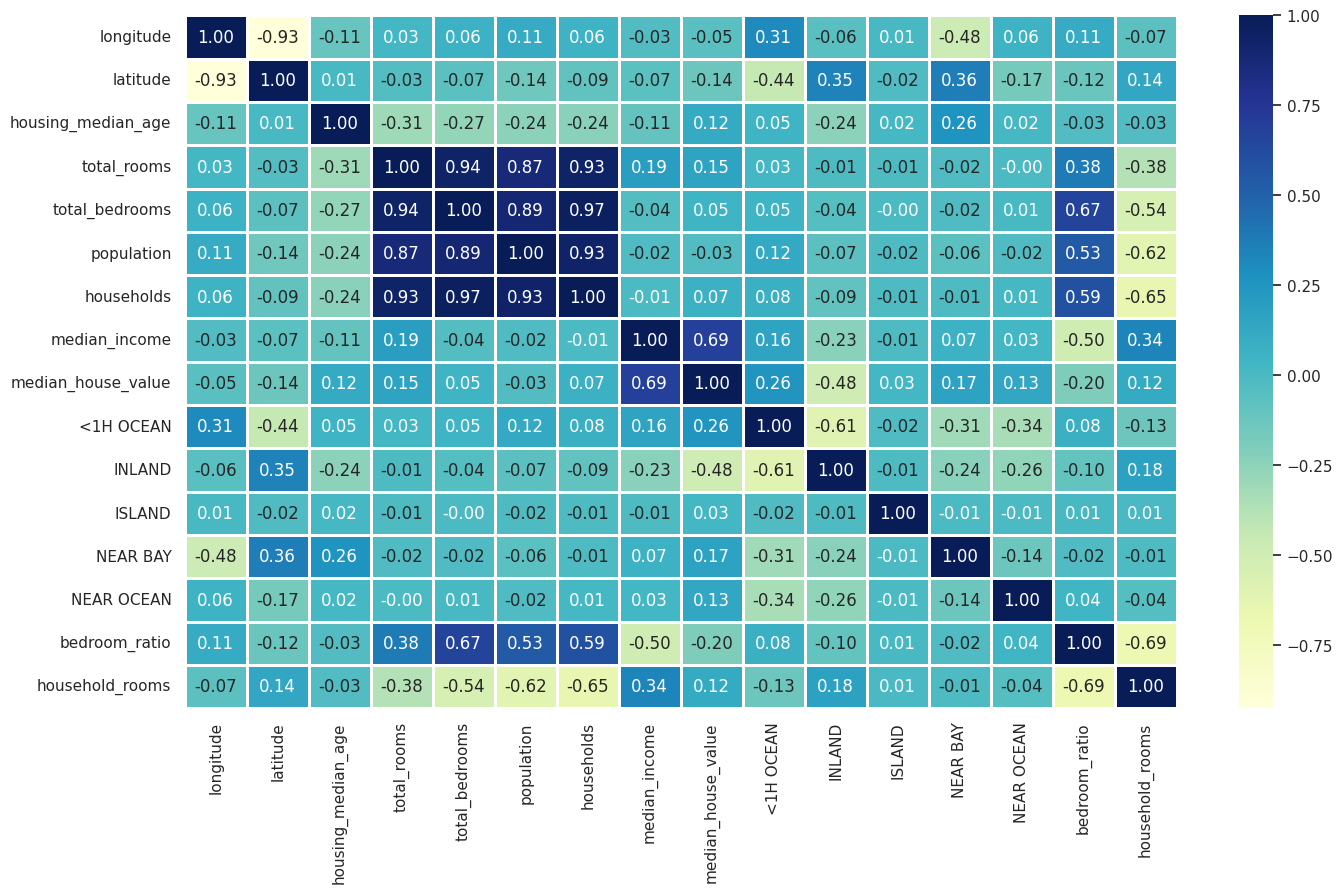

In [346]:
train_corr = train_data.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(train_corr, annot=True, linewidths=1, ax=ax, cmap='YlGnBu', fmt=".2f")
plt.show()

In [ ]:
# models